### DataSet Courtesy of IBM: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

In [2]:
# Display Maximum Columns when calling dataframe.head()
pd.set_option('display.max_columns', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv", index_col = False)
df = df.drop(columns=['customerID','gender'])
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [ ]:
df.isnull().sum(axis = 0)

In [ ]:
df.dtypes

In [ ]:
df.head()

In [4]:
Columns_Enc_OneHot = ['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                     'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
                      'PaperlessBilling','PaymentMethod']
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse = False)
df_OHE = pd.DataFrame(one_hot_encoder.fit_transform(df[Columns_Enc_OneHot]))
df_OHE.columns = one_hot_encoder.get_feature_names(Columns_Enc_OneHot)
df_OHE.index = np.arange(1, len(df)+1)                
df_OHE.head()

,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [5]:
df = df.drop(Columns_Enc_OneHot, axis=1)
df = pd.concat([df, df_OHE], axis=1)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,29.85,29.85,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,34.0,56.95,1889.5,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,2.0,53.85,108.15,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,2.0,70.70,151.65,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [7]:
df = df.dropna()

In [8]:
X = df
X = X.drop('Churn', axis=1)
y = df.iloc[:, 4]
X.head()
y.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,0.0,34.0,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,2.0,53.85,108.15,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,2.0,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,0.0,8.0,99.65,820.50,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


1    0.0
2    1.0
3    0.0
4    1.0
5    1.0
Name: Churn, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBRFClassifier

In [ ]:
model = LogisticRegression(random_state = 0) # 78.2%

In [ ]:
model = ExtraTreesClassifier(n_estimators=10) # 73.9%

In [ ]:
model = BaggingClassifier(n_estimators=10) # 75.5%

In [ ]:
model = DecisionTreeClassifier() # 72.2%

In [ ]:
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 5678) # 76.5%

In [ ]:
model = Pipeline([('s',StandardScaler()),('m',KNeighborsClassifier())]) # 71.9%

In [12]:
model = XGBRFClassifier(n_estimators = 10, subsample = 0.9, solsample_bynode = 0.2) # 78.5%

In [13]:
model.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[18:28:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "solsample_bynode" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='', max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=10, n_jobs=0,
                num_parallel_tree=10, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                sampling_method='uniform', scale_pos_weight=1, ...)

[[1186  108]
 [ 270  194]]


0.7849829351535836

<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5]),
 [Text(0, 0.5, 'SeniorCitizen'),
  Text(0, 2.5, 'MonthlyCharges'),
  Text(0, 4.5, 'Churn'),
  Text(0, 6.5, 'Partner_Yes'),
  Text(0, 8.5, 'Dependents_Yes'),
  Text(0, 10.5, 'PhoneService_Yes'),
  Text(0, 12.5, 'MultipleLines_No phone service'),
  Text(0, 14.5, 'InternetService_DSL'),
  Text(0, 16.5, 'InternetService_No'),
  Text(0, 18.5, 'OnlineSecurity_No internet service'),
  Text(0, 20.5, 'OnlineBackup_No'),
  Text(0, 22.5, 'OnlineBackup_Yes'),
  Text(0, 24.5, 'DeviceProtection_No internet service'),
  Text(0, 26.5, 'TechSupport_No'),
  Text(0, 28.5, 'TechSupport_Yes'),
  Text(0, 30.5, 'StreamingTV_No internet service'),
  Text(0, 32.5, 'StreamingMovies_No'),
  Text(0, 34.5, 'StreamingMovies_Yes'),
  Text(0, 36.5, 'Contract_One year'),
  Text(0, 38.5, 'PaperlessBilling_No'),
  Text(0, 40.5, 'PaymentMethod_Bank transfer (automatic)'),
 

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5]),
 [Text(0.5, 0, 'SeniorCitizen'),
  Text(2.5, 0, 'MonthlyCharges'),
  Text(4.5, 0, 'Churn'),
  Text(6.5, 0, 'Partner_Yes'),
  Text(8.5, 0, 'Dependents_Yes'),
  Text(10.5, 0, 'PhoneService_Yes'),
  Text(12.5, 0, 'MultipleLines_No phone service'),
  Text(14.5, 0, 'InternetService_DSL'),
  Text(16.5, 0, 'InternetService_No'),
  Text(18.5, 0, 'OnlineSecurity_No internet service'),
  Text(20.5, 0, 'OnlineBackup_No'),
  Text(22.5, 0, 'OnlineBackup_Yes'),
  Text(24.5, 0, 'DeviceProtection_No internet service'),
  Text(26.5, 0, 'TechSupport_No'),
  Text(28.5, 0, 'TechSupport_Yes'),
  Text(30.5, 0, 'StreamingTV_No internet service'),
  Text(32.5, 0, 'StreamingMovies_No'),
  Text(34.5, 0, 'StreamingMovies_Yes'),
  Text(36.5, 0, 'Contract_One year'),
  Text(38.5, 0, 'PaperlessBilling_No'),
  Text(40.5, 0, 'PaymentMethod_Bank transfer (automatic)'),
 

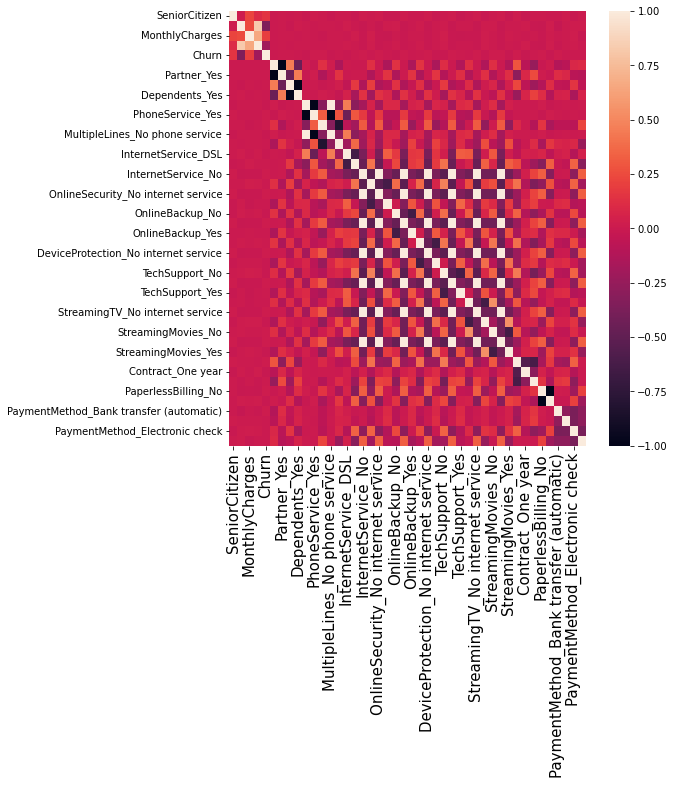

In [14]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr)
plt.yticks(rotation=0, size=10)
plt.xticks(rotation=90, size=15)
plt.show()

In [15]:
# convert X_train to a pandas DataFrame
X_train_df = pd.DataFrame(X_train)
#X_train_df = pd.DataFrame(X_train, columns=['feature_{}'.format(i) for i in range(X_train.shape[1])])


# get feature importances
importances = model.feature_importances_

# sort importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

# print feature importances in descending order
for i in range(len(sorted_importances)):
    print(f"{i+1}. {X_train_df.columns[sorted_indices[i]]}: {sorted_importances[i]}")


1. 1: 0.299508661031723
2. 2: 0.1294427216053009
3. 3: 0.059336818754673004
4. 0: 0.041254136711359024
5. 24: 0.03289632499217987
6. 31: 0.030215667560696602
7. 33: 0.028014112263917923
8. 38: 0.02712150476872921
9. 15: 0.02437957562506199
10. 40: 0.02228263020515442
11. 34: 0.021444354206323624
12. 39: 0.018784191459417343
13. 37: 0.01858373172581196
14. 14: 0.01734342612326145
15. 6: 0.017101304605603218
16. 4: 0.016271378844976425
17. 25: 0.01606777310371399
18. 16: 0.015995945781469345
19. 13: 0.014978216029703617
20. 7: 0.014961030334234238
21. 22: 0.014614658430218697
22. 30: 0.014522530138492584
23. 28: 0.01411781832575798
24. 12: 0.014000194147229195
25. 42: 0.012494426220655441
26. 36: 0.011714683845639229
27. 41: 0.01045179646462202
28. 19: 0.010145413689315319
29. 10: 0.009684605523943901
30. 21: 0.00780170364305377
31. 27: 0.006262263748794794
32. 18: 0.003908614162355661
33. 35: 0.003355935215950012
34. 8: 0.0004908944247290492
35. 11: 0.00045099679846316576
36. 9: 0.0
37.

In [ ]:
# convert X_train to a pandas DataFrame
X_train_df = pd.DataFrame(X_train)
#X_train_df = pd.DataFrame(X_train, columns=['feature_{}'.format(i) for i in range(X_train.shape[1])])
feature_importances_df = pd.DataFrame({'Feature Name': X_train_df.columns, 'Importance': importances})

# get feature importances
importances = model.feature_importances_

# sort importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

# print feature importances in descending order
for i in range(len(sorted_importances)):
    print(f"{i+1}. {feature_importances_df.columns[sorted_indices[i]]}: {sorted_importances[i]}")